In [120]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Data pre-processing

In [121]:
# data loading

import pandas as pd
import numpy as np

dataset = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [122]:
# Data insight 

dataset.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [123]:
dataset['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [124]:
dataset['HomePlanet'].fillna(dataset['HomePlanet'].mode()[0], inplace = True)
dataset.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [125]:
dataset['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [126]:
dataset['CryoSleep'].fillna(dataset['CryoSleep'].mode()[0], inplace = True)
dataset['CryoSleep'].value_counts()

CryoSleep
False    5656
True     3037
Name: count, dtype: int64

In [127]:
dataset['Cabin'].value_counts()

Cabin
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: count, Length: 6560, dtype: int64

In [128]:
dataset = dataset.drop(columns = 'PassengerId', axis = 1)
dataset.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [129]:
dataset['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [130]:
dataset['Destination'].fillna(dataset['Destination'].mode()[0], inplace = True)

In [131]:
dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)

In [132]:
dataset['RoomService'].fillna(dataset['RoomService'].mean(), inplace = True)
dataset['FoodCourt'].fillna(dataset['FoodCourt'].mean(), inplace = True)
dataset['ShoppingMall'].fillna(dataset['ShoppingMall'].mean(), inplace = True)
dataset['Spa'].fillna(dataset['Spa'].mean(), inplace = True)
dataset['VRDeck'].fillna(dataset['VRDeck'].mean(), inplace = True)


In [133]:
dataset.isnull().sum()

HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [134]:
dataset = dataset.drop(columns = ['Cabin', 'Name'])

In [135]:
dataset['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [136]:
dataset['VIP'].fillna(dataset['VIP'].mode()[0], inplace = True)

In [137]:
dataset.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [138]:
# Feature Encoding

dataset['HomePlanet'].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

In [139]:
dataset.replace({'HomePlanet': {'Earth': 0, 'Europa': 1, 'Mars':2}}, inplace = True)
dataset['HomePlanet'].value_counts()

HomePlanet
0    4803
1    2131
2    1759
Name: count, dtype: int64

In [140]:
dataset['Destination'].value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [141]:
dataset.replace({'Destination': {'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2}}, inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), int64(2)
memory usage: 568.9 KB


In [142]:
correlation = dataset.corr()


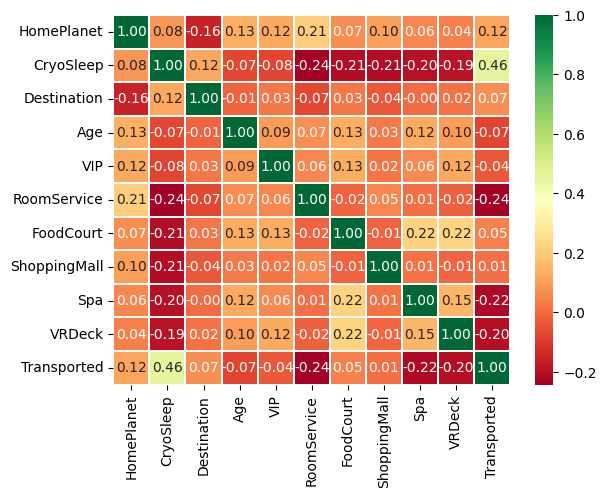

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(correlation, annot=True,fmt=".2f",cmap='RdYlGn',linewidths=0.30)

# Display the Pharma Sector Heatmap
plt.show()

In [144]:
# data spliting

X = dataset.drop('Transported', axis = 1)
Y = dataset['Transported']
Y.shape



(8693,)

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 1)
print(X.shape, X_train.shape, X_test.shape)

(8693, 10) (6954, 10) (1739, 10)


# Model Selection

In [146]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [147]:
model.fit(X_train, Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
pred = model.predict(X_test)


In [149]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, pred)
print(acc)

0.7837837837837838


In [150]:
# For test set

test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [151]:
test_x = test.drop(columns = 'PassengerId', axis = 1)
test_x.isnull().sum()


HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [152]:
# Filling missing values

test_x = test_x.drop(columns=['Cabin', 'Name'], axis = 1)
test_x['HomePlanet'].fillna(test_x['HomePlanet'].mode()[0], inplace = True)
test_x['Age'].fillna(test_x['Age'].mean(), inplace = True)
test_x['Destination'].fillna(test['Destination'].mode()[0], inplace = True)
test_x['CryoSleep'].fillna(test['CryoSleep'].mode()[0], inplace = True)
test_x['RoomService'].fillna(test_x['RoomService'].mean(), inplace = True)
test_x['FoodCourt'].fillna(test_x['FoodCourt'].mean(), inplace = True)
test_x['ShoppingMall'].fillna(test_x['ShoppingMall'].mean(), inplace = True)
test_x['Spa'].fillna(test_x['Spa'].mean(), inplace = True)
test_x['VRDeck'].fillna(test_x['VRDeck'].mean(), inplace = True)
test_x['VIP'].fillna(test_x['VIP'].mode()[0], inplace = True)

test_x.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [153]:
# Encoding

test_x.replace({'Destination': {'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2}}, inplace = True)
test_x.replace({'HomePlanet': {'Earth': 0, 'Europa': 1, 'Mars':2}}, inplace = True)

In [154]:
# prediction

pred = model.predict(test_x)
pred

array([ True, False,  True, ...,  True,  True,  True])

In [158]:
res = test.drop(columns = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'Spa', 'ShoppingMall', 'VRDeck', 'Name'], axis = 1)
res['Transported'] = pred
res.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [159]:

res.to_csv('submission.csv', index=False)